In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('feature_engineered_laptop.csv')
df

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,SSHD,FStorage
0,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1339.69,No,0,128,0,0
1,Ultrabook,13.3,1440x900,Intel i5,8,macOS,1.34,898.94,No,0,0,0,128
2,Notebook,15.6,1920x1080,Intel i5,8,No OS,1.86,575.00,No,0,256,0,0
3,Ultrabook,15.4,2880x1800,Intel i7,16,macOS,1.83,2537.45,No,0,512,0,0
4,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1803.60,No,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,1920x1080,Intel i7,4,Windows 10,1.80,638.00,Yes,0,128,0,0
1299,2 in 1 Convertible,13.3,3200x1800,Intel i7,16,Windows 10,1.30,1499.00,Yes,0,512,0,0
1300,Notebook,14.0,1366x768,Intel Celeron,2,Windows 10,1.50,229.00,No,0,0,0,64
1301,Notebook,15.6,1366x768,Intel i7,6,Windows 10,2.19,764.00,No,1000,0,0,0


In [3]:
# let move price column to the end
df['Price'] = df['Price_euros']
df.drop(columns=['Price_euros'], inplace=True)
df

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,TouchScreen,HDD,SSD,SSHD,FStorage,Price
0,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,No,0,128,0,0,1339.69
1,Ultrabook,13.3,1440x900,Intel i5,8,macOS,1.34,No,0,0,0,128,898.94
2,Notebook,15.6,1920x1080,Intel i5,8,No OS,1.86,No,0,256,0,0,575.00
3,Ultrabook,15.4,2880x1800,Intel i7,16,macOS,1.83,No,0,512,0,0,2537.45
4,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,No,0,256,0,0,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,1920x1080,Intel i7,4,Windows 10,1.80,Yes,0,128,0,0,638.00
1299,2 in 1 Convertible,13.3,3200x1800,Intel i7,16,Windows 10,1.30,Yes,0,512,0,0,1499.00
1300,Notebook,14.0,1366x768,Intel Celeron,2,Windows 10,1.50,No,0,0,0,64,229.00
1301,Notebook,15.6,1366x768,Intel i7,6,Windows 10,2.19,No,1000,0,0,0,764.00


In [4]:
df.shape

(1303, 13)

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

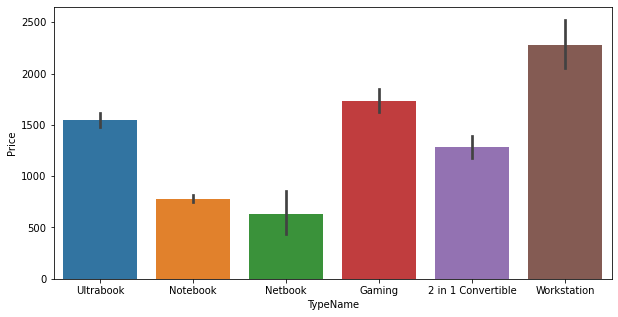

In [7]:
plt.subplots(figsize=(10, 5))
sns.barplot(x='TypeName', y='Price', data=df)

As can be seen, on average, workstation laptops are higher priced than other category of laptops. This is to be expected as workstation laptops have higher spec configurations (better cpu, more memory, faster clockspeed, etc) to meet the demands of clients in the profesional workspace.

Gaming laptops present the second highest priced category of laptops due to the same reasons as above.

Ultrabooks and 2 in 1 convertibles are cheaper than gaming laptops (on average).

Notebooks and netbooks are relatively cheaper than other category of laptops.

<AxesSubplot:xlabel='Inches', ylabel='Price'>

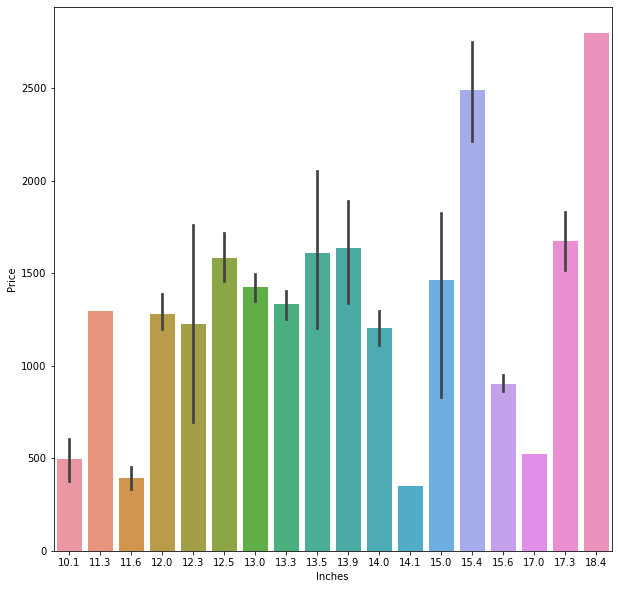

In [9]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Inches', y='Price', data=df)

Here we can see that the price of laptops can't solely be judge through the size of their displays (no direct linear correlation between screen size and price). This feature will still be kept for modelling later (high variance).

<AxesSubplot:xlabel='ScreenResolution', ylabel='Price'>

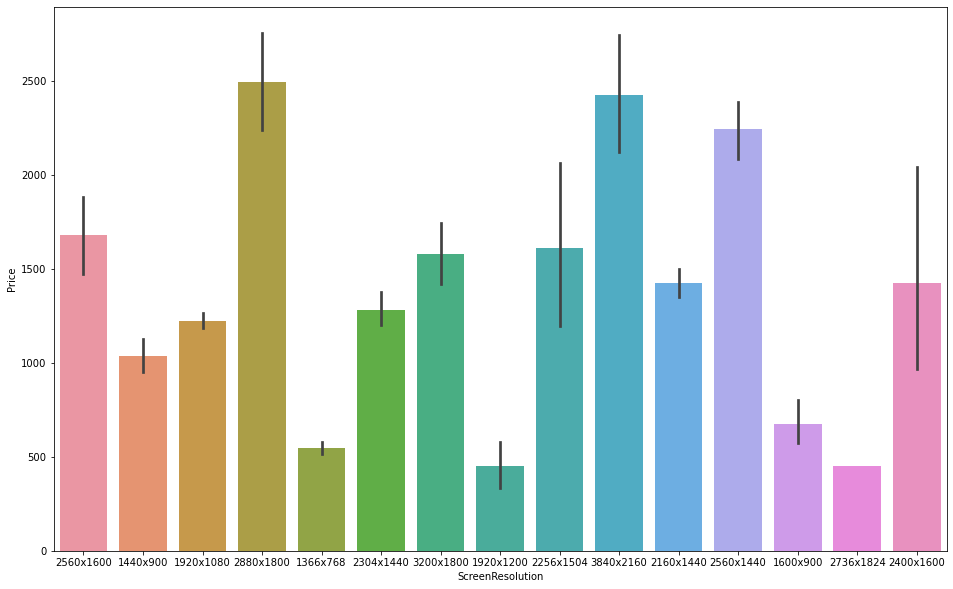

In [11]:
plt.subplots(figsize=(16,10))
sns.barplot(x='ScreenResolution', y='Price', data=df)

Screens with higher resolutions are generally higher priced. However, an outlier resolution, specifically (2736 * 1824) is lower priced than others.

In [18]:
print("%-12s%s"%("Resolution", "Count"))
df['ScreenResolution'].value_counts()

Resolution  Count


1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: ScreenResolution, dtype: int64

Since there's only 1 outlier laptop (2736 x 1824 resolution), this laptop will be removed.

In [19]:
#Removing outlier laptop
df = df.loc[~df['ScreenResolution'].str.contains('2736x1824')]
df['ScreenResolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
Name: ScreenResolution, dtype: int64

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

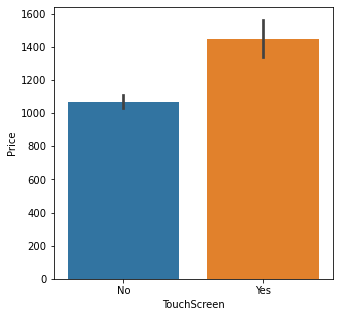

In [20]:
plt.subplots(figsize=(5,5))
sns.barplot(x='TouchScreen', y='Price', data=df)

Laptops with touchscreen capabilities are priced higher on average.

<AxesSubplot:xlabel='Cpu', ylabel='Price'>

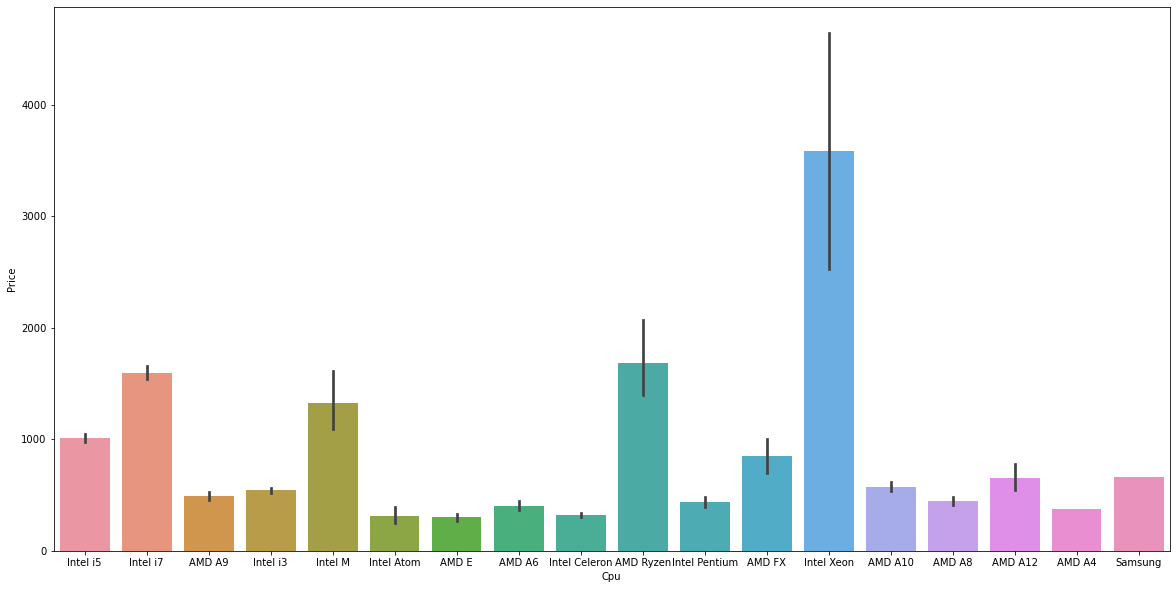

In [22]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Cpu', y='Price', data=df)

Higher powered processors/CPU are generally higher priced (Xeon > i7>i5>i3). The same goes for AMD CPus (Ryzen > AMD A series> E series...). Interestingly, laptops with intel M processors are higher priced than intel i5 processors (which is not expected as intel core M processors are lower powered CPUs).

In [24]:
temp_df = df.loc[df['Cpu'].str.contains('Intel M|Intel i5')]
temp_df.groupby(['Cpu']).mean()

,Inches,Ram,Weight,HDD,SSD,SSHD,FStorage,Price
Cpu,,,,,,,,
Intel M,12.521053,7.789474,1.088421,0.000000,255.157895,0.000000,87.578947,1324.231579
Intel i5,14.802600,6.959811,1.900095,325.361702,159.659574,5.929078,3.026005,1015.015248


As shown above, Intel M laptops have, in average, higher RAM, SSD and Flash Storage capacities than Intel i5 laptops. They are also much lighter than Intel i5 laptops. These factors contribute to the higher average prices of intel M laptops.

<AxesSubplot:xlabel='Ram', ylabel='Price'>

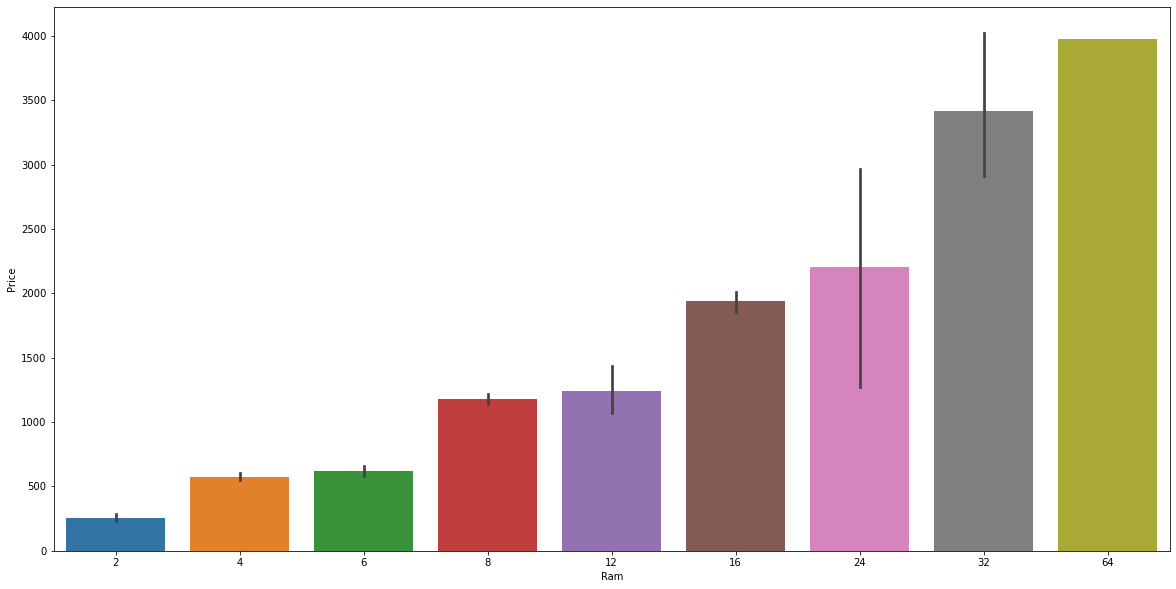

In [25]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Ram', y='Price', data=df)

Laptops with higher ram are higher priced. This variable is highly correlated to the price

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

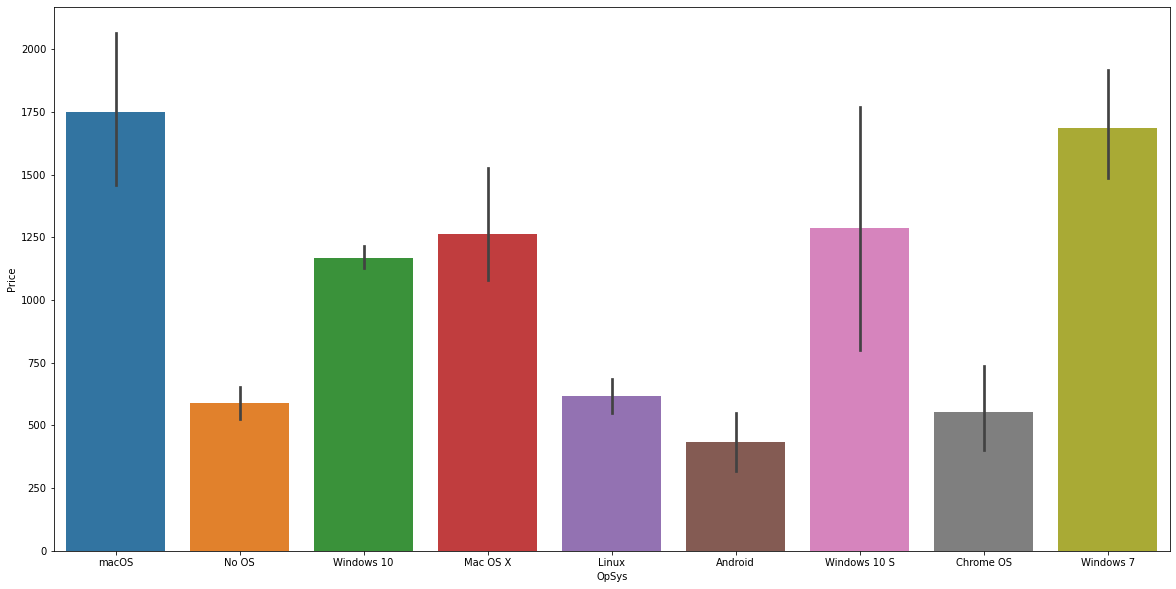

In [27]:
plt.subplots(figsize=(20,10))
sns.barplot(x='OpSys', y='Price', data=df)

<AxesSubplot:>

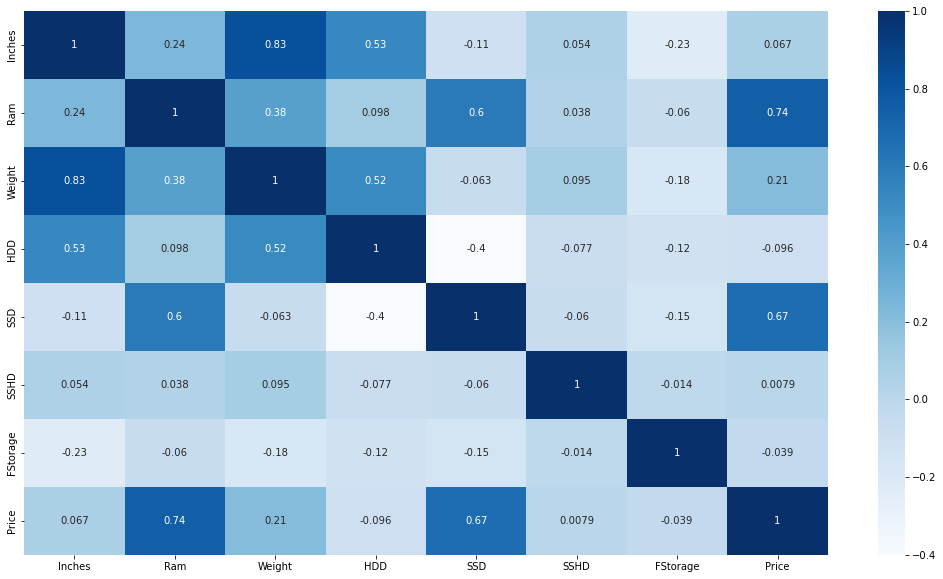

In [32]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [33]:
df.to_csv('EDA-ed_Laptop.csv', index=False)